In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

# split into X and Y
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

print(x.shape)
print(y.shape)


(4340, 7)
(4340,)


In [2]:
cat_columns = x.select_dtypes(['object']).columns
x[cat_columns] = x[cat_columns].apply(lambda x: pd.factorize(x)[0])


In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size=0.3, shuffle=False
)


In [4]:
BernNB = BernoulliNB()
BernNB.fit(X_train, Y_train)
Y_bpred = BernNB.predict(X_test)

b_accuracy = metrics.accuracy_score(Y_test, Y_bpred)
b_precision = metrics.precision_score(Y_test, Y_bpred, average='weighted', labels=np.unique(Y_bpred))
b_recall = metrics.recall_score(Y_test, Y_bpred, average='weighted', labels=np.unique(Y_bpred))
b_f1 = metrics.f1_score(Y_test, Y_bpred, average='weighted', labels=np.unique(Y_bpred))

print("Bernoulli NB Scores:")
print(b_accuracy, b_precision, b_recall, b_f1)


Bernoulli NB Scores:
0.6597542242703534 0.5860735069090088 0.7248945147679325 0.584521086511971


In [5]:
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
Y_rpred = RF.predict(X_test)

r_accuracy = metrics.accuracy_score(Y_test, Y_rpred)
r_precision = metrics.precision_score(Y_test, Y_rpred, average='weighted', labels=np.unique(Y_rpred))
r_recall = metrics.recall_score(Y_test, Y_rpred, average='weighted', labels=np.unique(Y_rpred))
r_f1 = metrics.f1_score(Y_test, Y_rpred, average='weighted', labels=np.unique(Y_rpred))

print("Random Forest Scores:")
print(r_accuracy, r_precision, r_recall, r_f1)


Random Forest Scores:
0.695084485407066 0.6670680116233293 0.6956187548039969 0.6762384638970769


In [6]:
GausNB = GaussianNB()
GausNB.fit(X_train, Y_train)
Y_gpred = GausNB.predict(X_test)

g_accuracy = metrics.accuracy_score(Y_test, Y_gpred)
g_precision = metrics.precision_score(Y_test, Y_gpred, average='weighted', labels=np.unique(Y_gpred))
g_recall = metrics.recall_score(Y_test, Y_gpred, average='weighted', labels=np.unique(Y_gpred))
g_f1 = metrics.f1_score(Y_test, Y_gpred, average='weighted', labels=np.unique(Y_gpred))

print("Gaussian NB Scores:")
print(g_accuracy, g_precision, g_recall, g_f1)


Gaussian NB Scores:
0.6359447004608295 0.6279825672121577 0.6359447004608295 0.6267486179577506


In [7]:
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train, Y_train)
Y_dpred = Dtree.predict(X_test)

d_accuracy = metrics.accuracy_score(Y_test, Y_dpred)
d_precision = metrics.precision_score(Y_test, Y_dpred, average='weighted', labels=np.unique(Y_dpred))
d_recall = metrics.recall_score(Y_test, Y_dpred, average='weighted', labels=np.unique(Y_dpred))
d_f1 = metrics.f1_score(Y_test, Y_dpred, average='weighted', labels=np.unique(Y_dpred))

print("Decision Tree Scores:")
print(d_accuracy, d_precision, d_recall, d_f1)


Decision Tree Scores:
0.5729646697388633 0.6167661574711983 0.5729646697388633 0.5888305073753503


In [8]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train, Y_train)
Y_mpred = MultiNB.predict(X_test)

m_accuracy = metrics.accuracy_score(Y_test, Y_mpred)
m_precision = metrics.precision_score(Y_test, Y_mpred, average='weighted', labels=np.unique(Y_mpred))
m_recall = metrics.recall_score(Y_test, Y_mpred, average='weighted', labels=np.unique(Y_mpred))
m_f1 = metrics.f1_score(Y_test, Y_mpred, average='weighted', labels=np.unique(Y_mpred))

print("Multinomial NB Scores:")
print(m_accuracy, m_precision, m_recall, m_f1)


Multinomial NB Scores:
0.4001536098310292 0.6386142226654948 0.4001536098310292 0.4768532387091069


In [9]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
Y_kpred = KNN.predict(X_test)

k_accuracy = metrics.accuracy_score(Y_test, Y_kpred)
k_precision = metrics.precision_score(Y_test, Y_kpred, average='weighted', labels=np.unique(Y_kpred))
k_recall = metrics.recall_score(Y_test, Y_kpred, average='weighted', labels=np.unique(Y_kpred))
k_f1 = metrics.f1_score(Y_test, Y_kpred, average='weighted', labels=np.unique(Y_kpred))

print("KNN Scores:")
print(k_accuracy, k_precision, k_recall, k_f1)


KNN Scores:
0.6367127496159755 0.5870803541155117 0.6367127496159755 0.6050097666579305


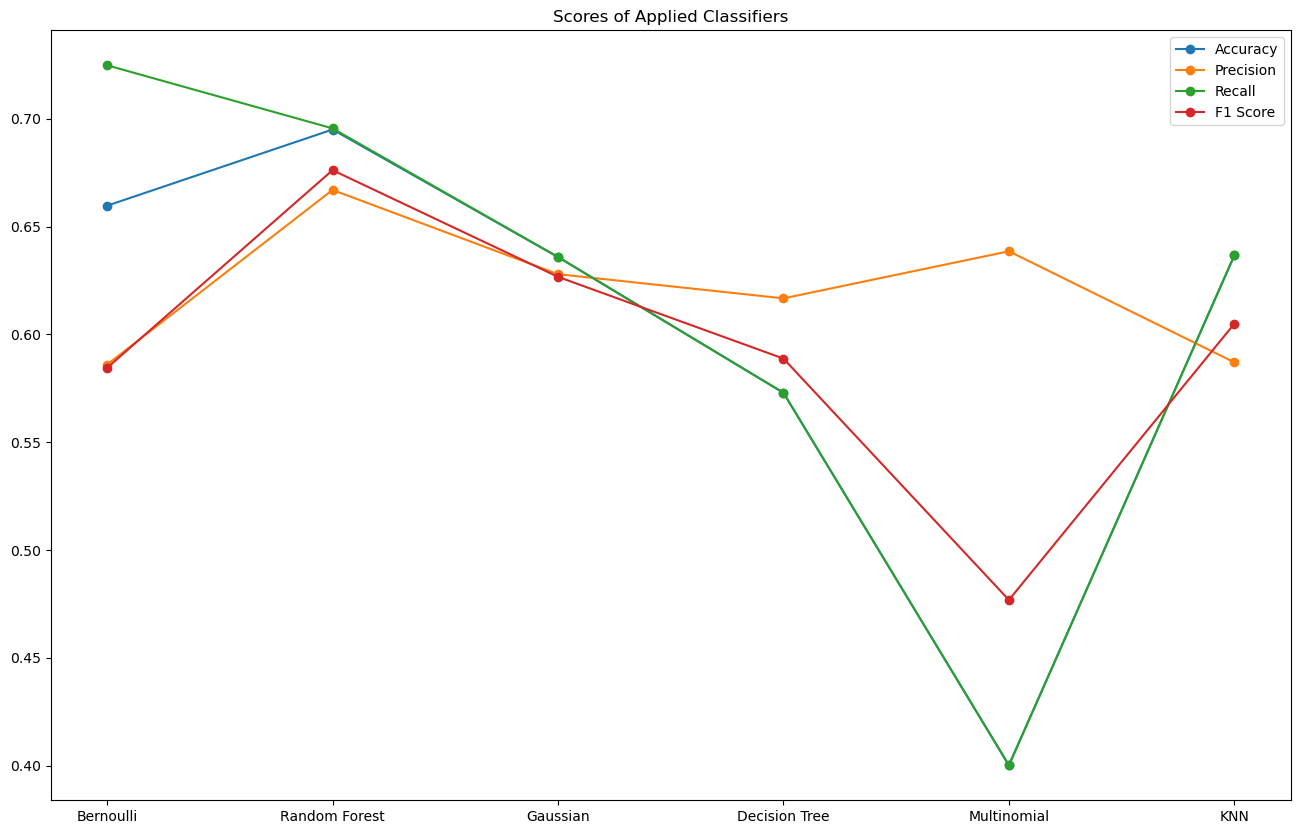

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))

classifiers = ['Bernoulli', 'Random Forest', 'Gaussian', 'Decision Tree', 'Multinomial', 'KNN']

plt.plot(classifiers, [b_accuracy, r_accuracy, g_accuracy, d_accuracy, m_accuracy, k_accuracy], marker='o', label='Accuracy')
plt.plot(classifiers, [b_precision, r_precision, g_precision, d_precision, m_precision, k_precision], marker='o', label='Precision')
plt.plot(classifiers, [b_recall, r_recall, g_recall, d_recall, m_recall, k_recall], marker='o', label='Recall')
plt.plot(classifiers, [b_f1, r_f1, g_f1, d_f1, m_f1, k_f1], marker='o', label='F1 Score')

plt.title("Scores of Applied Classifiers")
plt.legend()
plt.show()


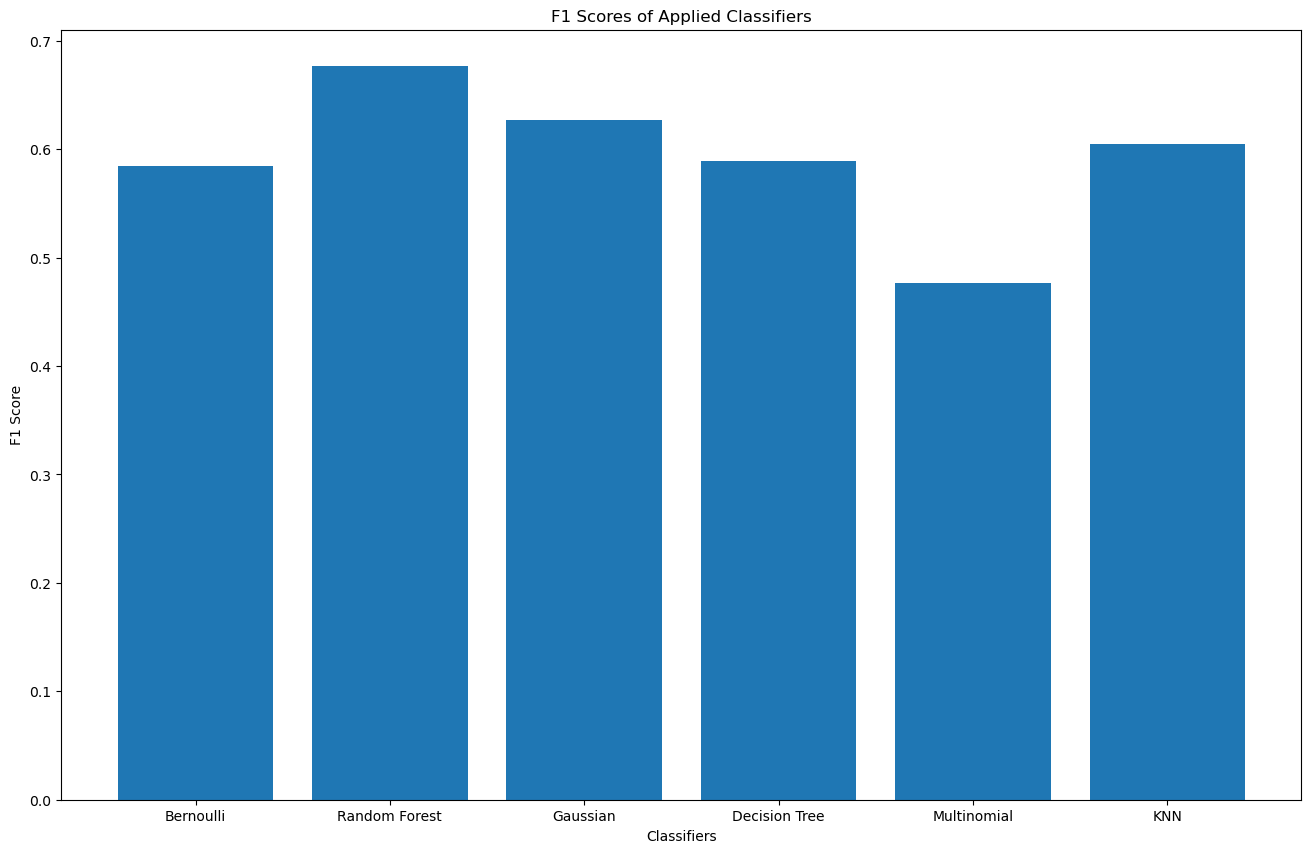

In [11]:
left = [1,2,3,4,5,6]
height = [b_f1, r_f1, g_f1, d_f1, m_f1, k_f1]
labels = ['Bernoulli','Random Forest','Gaussian','Decision Tree','Multinomial','KNN']

plt.figure(figsize=(16,10))
plt.bar(left, height, tick_label=labels)
plt.xlabel("Classifiers")
plt.ylabel("F1 Score")
plt.title("F1 Scores of Applied Classifiers")
plt.show()


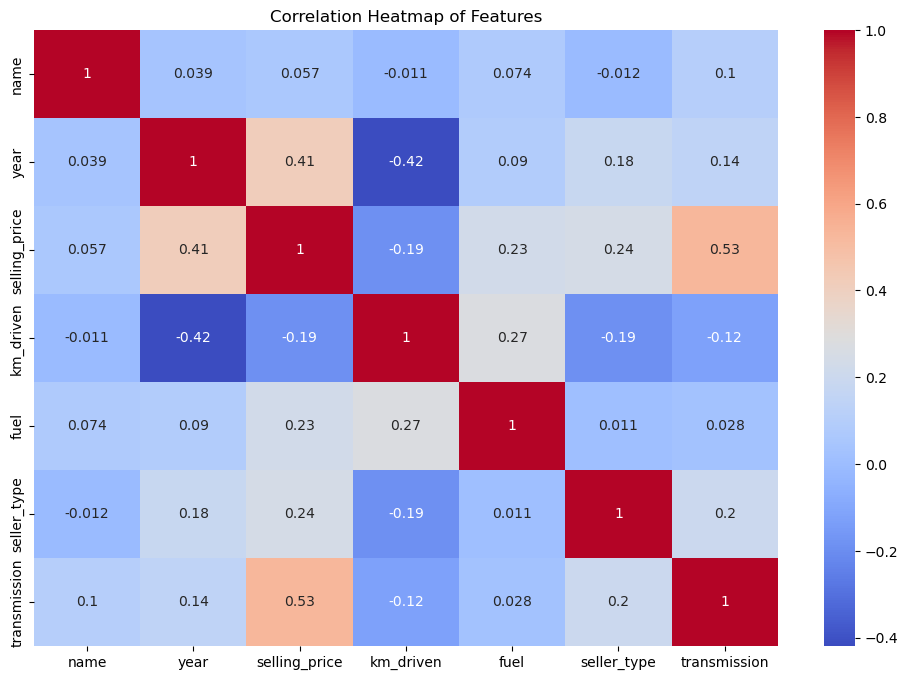

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()


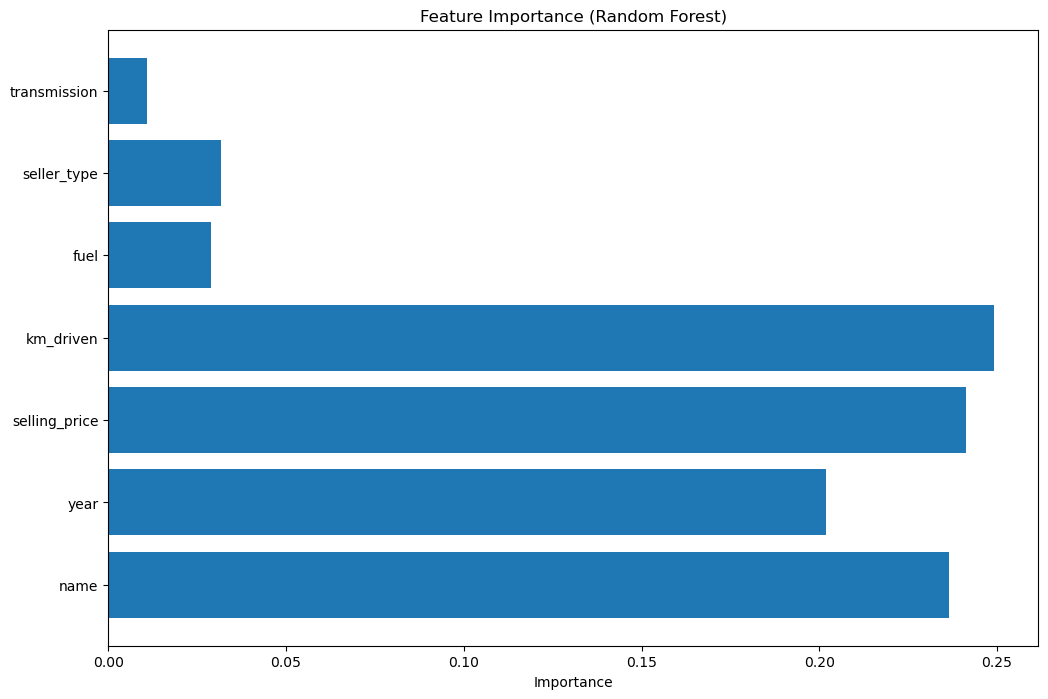

In [13]:
importances = RF.feature_importances_
labels = x.columns

plt.figure(figsize=(12,8))
plt.barh(labels, importances)
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()


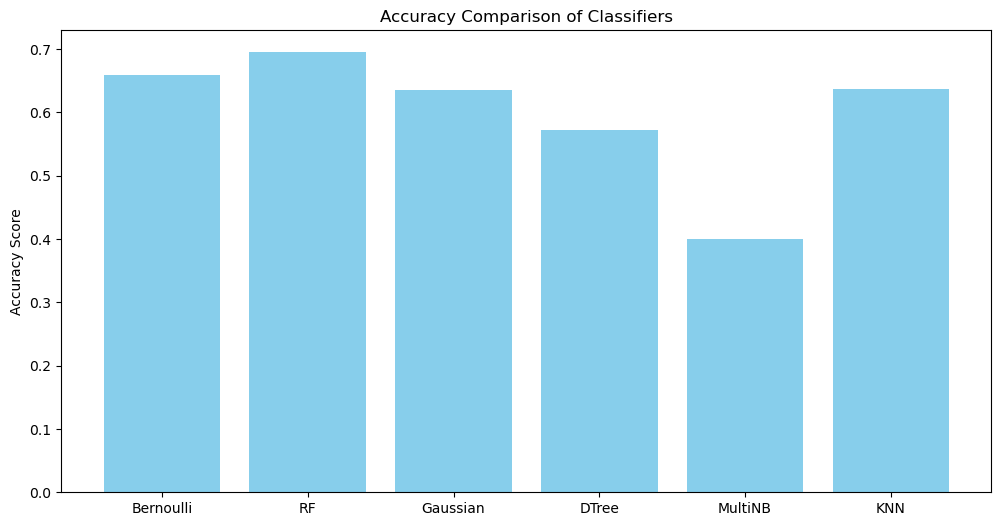

In [14]:
accuracy_scores = [b_accuracy, r_accuracy, g_accuracy, d_accuracy, m_accuracy, k_accuracy]
names = ['Bernoulli','RF','Gaussian','DTree','MultiNB','KNN']

plt.figure(figsize=(12,6))
plt.bar(names, accuracy_scores, color='skyblue')
plt.title("Accuracy Comparison of Classifiers")
plt.ylabel("Accuracy Score")
plt.show()


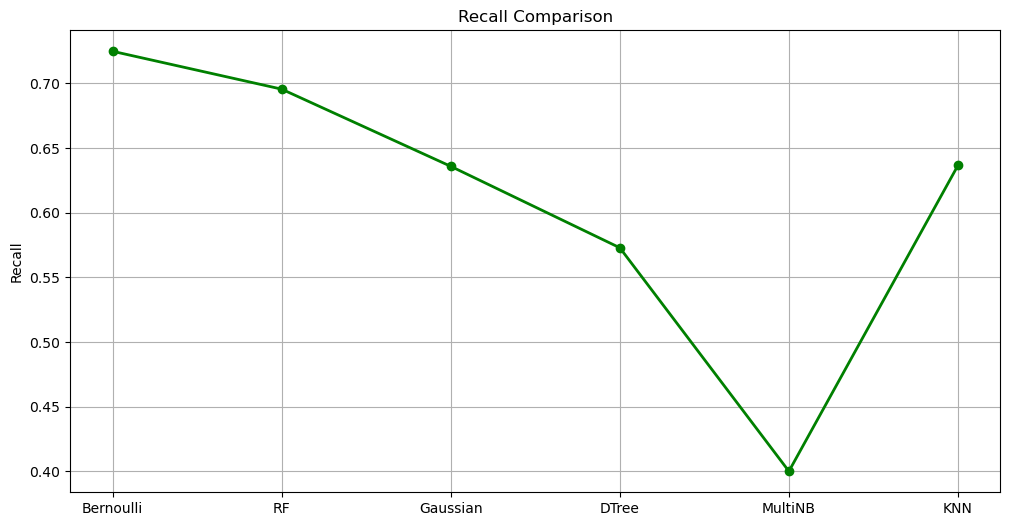

In [15]:
recall_scores = [b_recall, r_recall, g_recall, d_recall, m_recall, k_recall]

plt.figure(figsize=(12,6))
plt.plot(names, recall_scores, marker='o', linewidth=2, color='green')
plt.title("Recall Comparison")
plt.ylabel("Recall")
plt.grid(True)
plt.show()


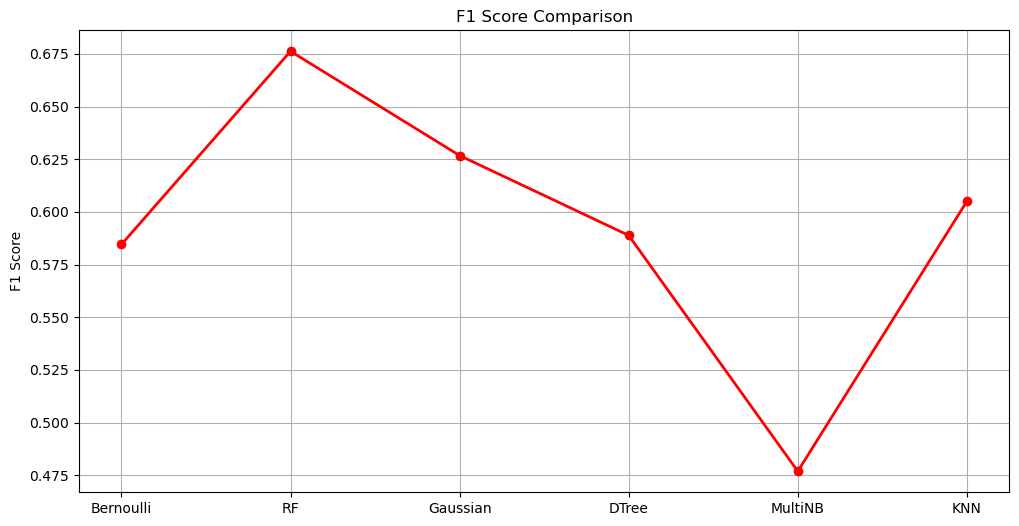

In [16]:
f1_scores = [b_f1, r_f1, g_f1, d_f1, m_f1, k_f1]

plt.figure(figsize=(12,6))
plt.plot(names, f1_scores, marker='o', linewidth=2, color='red')
plt.title("F1 Score Comparison")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()


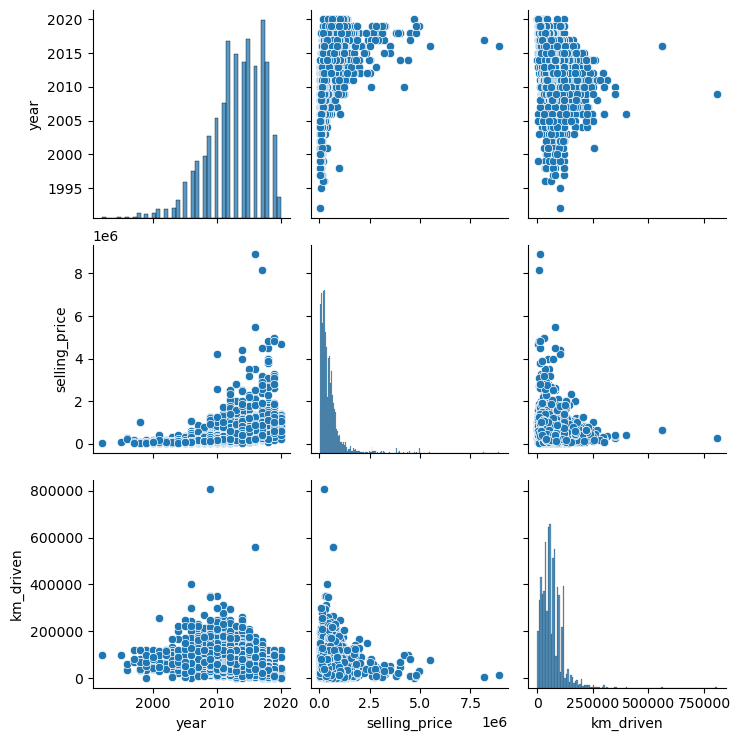

In [17]:
import seaborn as sns

sns.pairplot(data)
plt.show()


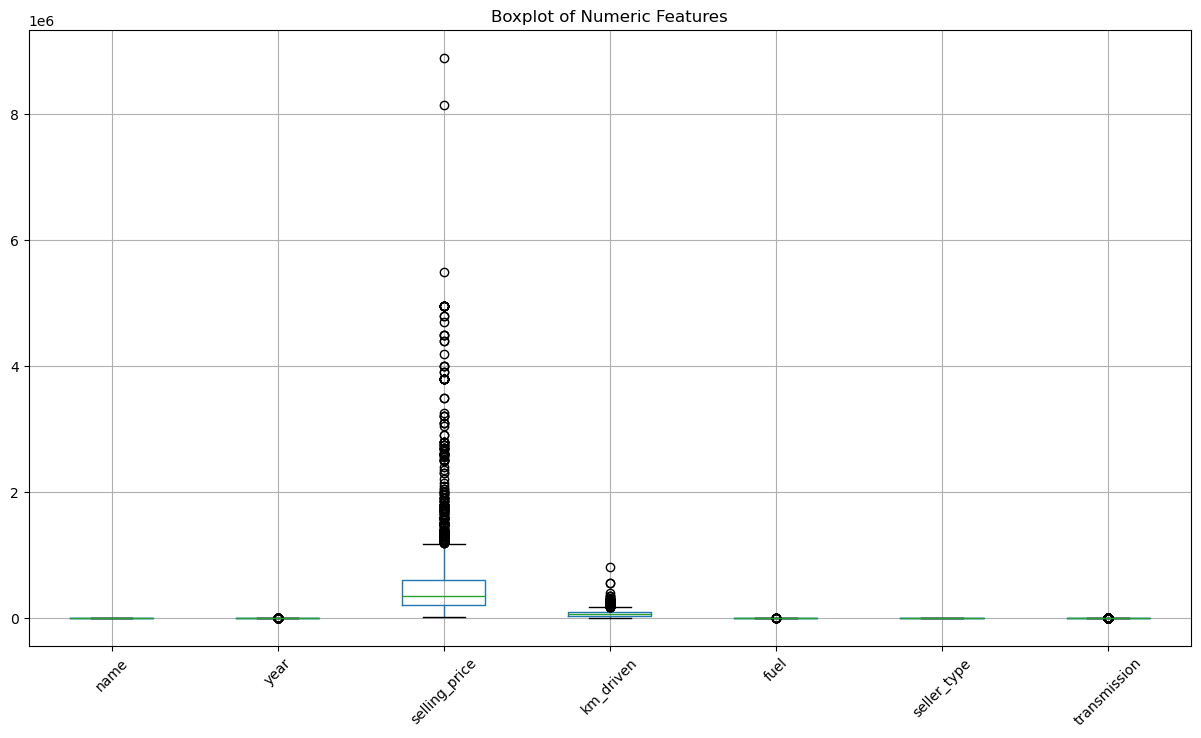

In [18]:
plt.figure(figsize=(15,8))
x.boxplot()
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()
